## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)

In [28]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import fashion_mnist
from keras.optimizers import RMSprop, SGD, Adam, Nadam

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

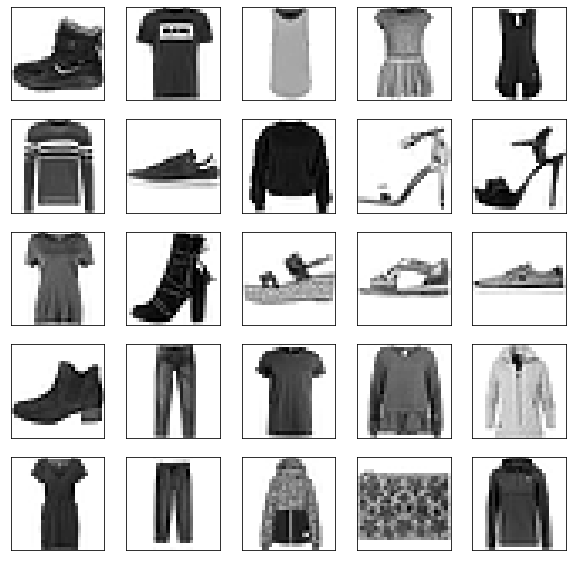

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [8]:
# Normalize the images.
train_images = (train_images / 255) - 1
test_images = (test_images / 255) - 1

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [9]:
train_images.shape

(60000, 784)

In [10]:
# Build the model.
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'],)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
y_t = to_categorical(train_labels)
y_tt = to_categorical(test_labels)

In [12]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [14]:
# Train the model.
h = model.fit(
    train_images[:,:],
    y_t,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_tt
)
# [model.evaluate(train_images, y_tr, batch_size=32)[1], model.evaluate(test_images, y_tt, batch_size=32)[1]]

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:5])

Epoch 1/15
1500/1500 [==============================] - 1s 708us/step - loss: 0.6611 - accuracy: 0.7625 - val_loss: 0.4966 - val_accuracy: 0.8202
Epoch 2/15
1500/1500 [==============================] - 1s 625us/step - loss: 0.5027 - accuracy: 0.8203 - val_loss: 0.4846 - val_accuracy: 0.8256
Epoch 3/15
1500/1500 [==============================] - 1s 627us/step - loss: 0.4674 - accuracy: 0.8316 - val_loss: 0.5217 - val_accuracy: 0.8101
Epoch 4/15
1500/1500 [==============================] - 1s 634us/step - loss: 0.4441 - accuracy: 0.8397 - val_loss: 0.4759 - val_accuracy: 0.8255
Epoch 5/15
1500/1500 [==============================] - 1s 643us/step - loss: 0.4314 - accuracy: 0.8450 - val_loss: 0.4459 - val_accuracy: 0.8379
Epoch 6/15
1500/1500 [==============================] - 1s 630us/step - loss: 0.4174 - accuracy: 0.8499 - val_loss: 0.4366 - val_accuracy: 0.8458
Epoch 7/15
1500/1500 [==============================] - 1s 649us/step - loss: 0.4046 - accuracy: 0.8539 - val_loss: 0.4130 -

__число нейронов в слое(для 2-хслойной сети)__

In [15]:
def create_model(layers, neurons):
    model = Sequential()
    model.add(Dense(neurons, activation = 'relu', input_shape=(784,)))
    for k in range(layers - 2):
        model.add(Dense(neurons * (10-k) * 0.06, activation='relu', input_shape=(784,)))

    model.add(Dense(10, activation='softmax'))

    return model

In [16]:
results = []
for i in [2, 8, 16, 32, 64, 128, 256, 512]:
    # define the keras model
    model = create_model(2, i)
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    h = model.fit(
        train_images[:, :],
        y_t[:, :],
        epochs=15,
        batch_size=10,
        validation_split=0.2
    )
    results.append(pd.DataFrame(h.history))

Epoch 1/15
4800/4800 [==============================] - 2s 509us/step - loss: 1.8345 - accuracy: 0.2365 - val_loss: 1.6123 - val_accuracy: 0.2900
Epoch 2/15
4800/4800 [==============================] - 2s 486us/step - loss: 1.5463 - accuracy: 0.3158 - val_loss: 1.4871 - val_accuracy: 0.3397
Epoch 3/15
4800/4800 [==============================] - 2s 486us/step - loss: 1.4740 - accuracy: 0.3424 - val_loss: 1.4408 - val_accuracy: 0.3598
Epoch 4/15
4800/4800 [==============================] - 2s 490us/step - loss: 1.4389 - accuracy: 0.3564 - val_loss: 1.4214 - val_accuracy: 0.3483
Epoch 5/15
4800/4800 [==============================] - 2s 495us/step - loss: 1.4203 - accuracy: 0.3616 - val_loss: 1.4071 - val_accuracy: 0.3838
Epoch 6/15
4800/4800 [==============================] - 2s 490us/step - loss: 1.4034 - accuracy: 0.3720 - val_loss: 1.3854 - val_accuracy: 0.3729
Epoch 7/15
4800/4800 [==============================] - 2s 497us/step - loss: 1.3917 - accuracy: 0.3759 - val_loss: 1.3701 -

Epoch 12/15
4800/4800 [==============================] - 2s 497us/step - loss: 0.4208 - accuracy: 0.8483 - val_loss: 0.4279 - val_accuracy: 0.8482
Epoch 13/15
4800/4800 [==============================] - 2s 495us/step - loss: 0.4180 - accuracy: 0.8498 - val_loss: 0.4695 - val_accuracy: 0.8366
Epoch 14/15
4800/4800 [==============================] - 2s 497us/step - loss: 0.4158 - accuracy: 0.8495 - val_loss: 0.4403 - val_accuracy: 0.8447
Epoch 15/15
4800/4800 [==============================] - 2s 497us/step - loss: 0.4131 - accuracy: 0.8524 - val_loss: 0.4398 - val_accuracy: 0.8423
Epoch 1/15
4800/4800 [==============================] - 3s 553us/step - loss: 0.6463 - accuracy: 0.7667 - val_loss: 0.5074 - val_accuracy: 0.8170
Epoch 2/15
4800/4800 [==============================] - 3s 524us/step - loss: 0.5019 - accuracy: 0.8178 - val_loss: 0.4879 - val_accuracy: 0.8200
Epoch 3/15
4800/4800 [==============================] - 3s 523us/step - loss: 0.4673 - accuracy: 0.8308 - val_loss: 0.48

4800/4800 [==============================] - 6s 1ms/step - loss: 0.3721 - accuracy: 0.8626 - val_loss: 0.3907 - val_accuracy: 0.8568
Epoch 9/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3657 - accuracy: 0.8659 - val_loss: 0.3958 - val_accuracy: 0.8572
Epoch 10/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3567 - accuracy: 0.8699 - val_loss: 0.4181 - val_accuracy: 0.8518
Epoch 11/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3525 - accuracy: 0.8699 - val_loss: 0.4452 - val_accuracy: 0.8417
Epoch 12/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3460 - accuracy: 0.8728 - val_loss: 0.3738 - val_accuracy: 0.8666
Epoch 13/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3390 - accuracy: 0.8753 - val_loss: 0.3698 - val_accuracy: 0.8697
Epoch 14/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3355 - accuracy: 0.8770 - val_loss: 0.3750 - val_accuracy: 0.867

In [17]:
res = pd.DataFrame({
    'neurons': [2, 8, 16, 32, 64, 128, 256, 512],
    'loss': [float(result['loss'][-1:]) for result in results],
    'accuracy': [float(result['accuracy'][-1:]) for result in results],
    'val_loss': [float(result['val_loss'][-1:]) for result in results],
    'val_accuracy': [float(result['val_accuracy'][-1:]) for result in results]
})
res

,neurons,loss,accuracy,val_loss,val_accuracy
0,2,1.342826,0.406521,1.323872,0.432500
1,8,0.784909,0.718063,0.777644,0.726083
2,16,0.412348,0.852229,0.523018,0.819500
3,32,0.413138,0.852354,0.439767,0.842333
4,64,0.371318,0.863979,0.413325,0.844250
5,128,0.342275,0.872833,0.396480,0.857250
6,256,0.336770,0.875854,0.368515,0.868250
7,512,0.332555,0.877167,0.398109,0.859417


При увеличении количества нейронов, результаты моделей улучшаются прямопропорционально. После увеличения нейронов больше 128, accuracy растет, но уже медленее, чем до этого, также растет разница между трейном и тестом

__Число слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).__

In [18]:
layers_result = []
for layers in [2, 3, 5, 10]:
    model = create_model(layers, 256)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    h = model.fit(
        train_images[:, :],
        y_t[:, :],
        epochs=15,
        batch_size=10,
        validation_split=0.2
    )
    layers_result.append(pd.DataFrame(h.history))

Epoch 1/15
4800/4800 [==============================] - 4s 754us/step - loss: 0.6252 - accuracy: 0.7714 - val_loss: 0.5535 - val_accuracy: 0.8022
Epoch 2/15
4800/4800 [==============================] - 4s 733us/step - loss: 0.4926 - accuracy: 0.8189 - val_loss: 0.4735 - val_accuracy: 0.8252
Epoch 3/15
4800/4800 [==============================] - 4s 736us/step - loss: 0.4507 - accuracy: 0.8349 - val_loss: 0.4547 - val_accuracy: 0.8338
Epoch 4/15
4800/4800 [==============================] - 3s 728us/step - loss: 0.4260 - accuracy: 0.8434 - val_loss: 0.4408 - val_accuracy: 0.8355
Epoch 5/15
4800/4800 [==============================] - 3s 717us/step - loss: 0.4118 - accuracy: 0.8485 - val_loss: 0.4191 - val_accuracy: 0.8468
Epoch 6/15
4800/4800 [==============================] - 4s 739us/step - loss: 0.3955 - accuracy: 0.8555 - val_loss: 0.3860 - val_accuracy: 0.8599
Epoch 7/15
4800/4800 [==============================] - 4s 747us/step - loss: 0.3872 - accuracy: 0.8589 - val_loss: 0.4014 -

4800/4800 [==============================] - 6s 1ms/step - loss: 0.4223 - accuracy: 0.8480 - val_loss: 0.4480 - val_accuracy: 0.8433
Epoch 11/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4105 - accuracy: 0.8533 - val_loss: 0.4283 - val_accuracy: 0.8483
Epoch 12/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4044 - accuracy: 0.8556 - val_loss: 0.4345 - val_accuracy: 0.8532
Epoch 13/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.4039 - accuracy: 0.8558 - val_loss: 0.3864 - val_accuracy: 0.8643
Epoch 14/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3959 - accuracy: 0.8594 - val_loss: 0.4248 - val_accuracy: 0.8525
Epoch 15/15
4800/4800 [==============================] - 6s 1ms/step - loss: 0.3867 - accuracy: 0.8611 - val_loss: 0.4114 - val_accuracy: 0.8503


In [20]:
layer_res = pd.DataFrame({
    'layers': [2, 3, 5, 10],
    'loss': [float(l['loss'][-1:]) for l in layers_result],
    'accuracy': [float(l['accuracy'][-1:]) for l in layers_result],
    'val_loss': [float(l['val_loss'][-1:]) for l in layers_result],
    'val_accuracy': [float(l['val_accuracy'][-1:]) for l in layers_result]
})
layer_res

,layers,loss,accuracy,val_loss,val_accuracy
0,2,0.333688,0.876750,0.372429,0.864500
1,3,0.322064,0.880562,0.398034,0.854917
2,5,0.344821,0.874333,0.379211,0.865750
3,10,0.386737,0.861063,0.411358,0.850250


При увеличении количества слоев результаты моделей растут, но так происходит до 3-х слоев, после увеличения слоев больше чем 3, метрика начинает уменьшаться

__Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy__

sgd optimizer, accurasy:
	Train: 0.8692333102226257
	Test: 0.8557999730110168
adam optimizer, accurasy:
	Train: 0.8809166550636292
	Test: 0.8622000217437744
nadam optimizer, accurasy:
	Train: 0.8830666542053223
	Test: 0.8640999794006348
rmsprop optimizer, accurasy:
	Train: 0.8674499988555908
	Test: 0.8511999845504761


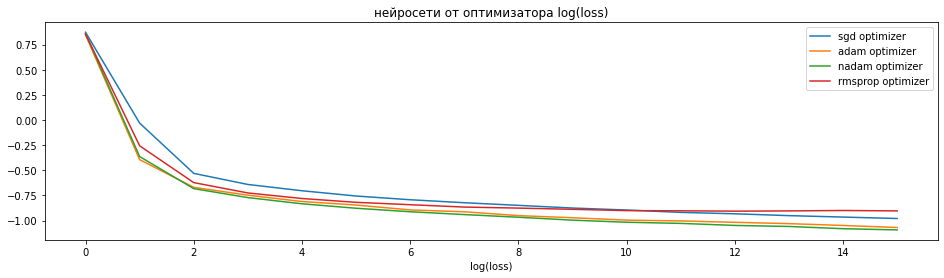

In [38]:
plt.figure(figsize=(16,4))
# Models
for opt in ('sgd', 'adam', 'nadam', 'rmsprop'):
    # build
    model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])
      # compile
    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
    metrics=['accuracy'])
      # calc errors
    hh0_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
      # fitting
    hh_train = model.fit(
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=32, 
        validation_split=0.2,
        verbose=0)
    hh1_train = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
    hh_test = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
    print(f"{opt} optimizer, accurasy:")
    print(f"\tTrain: {hh1_train[1]}")
    print(f"\tTest: {hh_test[1]}")

    plt.plot(epoch, np.log([hh0_train[0]] + hh_train.history['loss']), label=f'{opt} optimizer')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

Видим, что adam показывает себя лучше всех 

__Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)__

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score

In [40]:
def evaluate_results(y_test, y_predict):
    f1 = f1_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict, average='binary')
    prc = precision_score(y_test, y_predict, average='binary')

    return f1, prc, rec

In [41]:
modeli.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_73 (Dense)             (None, 76)                9804      
_________________________________________________________________
dense_74 (Dense)             (None, 69)                5313      
_________________________________________________________________
dense_75 (Dense)             (None, 61)                4270      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                620       
Total params: 120,487
Trainable params: 120,487
Non-trainable params: 0
_________________________________________________________________


In [42]:
y_pred = modeli.predict(test_images)
y_pred_class = np.argmax(y_pred, axis = 1)

In [43]:
multilabel_confusion_matrix(test_labels, y_pred_class)

array([[[8808,  192],
        [ 204,  796]],

       [[8997,    3],
        [  55,  945]],

       [[8864,  136],
        [ 373,  627]],

       [[8826,  174],
        [ 130,  870]],

       [[8450,  550],
        [ 124,  876]],

       [[8945,   55],
        [  88,  912]],

       [[8734,  266],
        [ 525,  475]],

       [[8901,   99],
        [ 162,  838]],

       [[8918,   82],
        [  34,  966]],

       [[8833,  167],
        [  29,  971]]], dtype=int64)

In [44]:
scores = score(test_labels, y_pred_class)[:-1]
scores

(array([0.80566802, 0.99683544, 0.82175623, 0.83333333, 0.61430575,
        0.94312306, 0.64102564, 0.89434365, 0.92175573, 0.85325132]),
 array([0.796, 0.945, 0.627, 0.87 , 0.876, 0.912, 0.475, 0.838, 0.966,
        0.971]),
 array([0.80080483, 0.97022587, 0.71128758, 0.85127202, 0.72217642,
        0.92730046, 0.54566341, 0.86525555, 0.94335938, 0.90832554]))

In [45]:
pd.DataFrame(scores, index = ['precision', 'recall', 'fscore'],)

,0,1,2,3,4,5,6,7,8,9
precision,0.805668,0.996835,0.821756,0.833333,0.614306,0.943123,0.641026,0.894344,0.921756,0.853251
recall,0.796000,0.945000,0.627000,0.870000,0.876000,0.912000,0.475000,0.838000,0.966000,0.971000
fscore,0.800805,0.970226,0.711288,0.851272,0.722176,0.927300,0.545663,0.865256,0.943359,0.908326


Согласно полученным данным, видим, что хуже всего распознаются классы под номерами: 0, 2, 4, 6.